<a href="https://colab.research.google.com/github/KingAgastya/Confusion-Matrix/blob/main/Confusion_Matrix_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
fileData = files.upload()

Saving data.csv to data.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

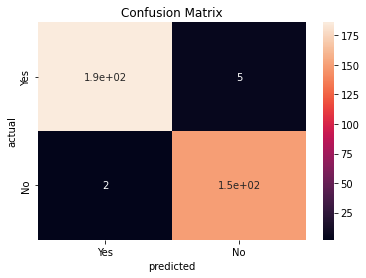

In [ ]:
fileInfo = pd.read_csv('data.csv')
reality = fileInfo['class']

factors = fileInfo[['variance', 'skewness', 'curtosis', 'entropy']]

factors_train, factors_test, reality_train, reality_test = train_test_split(factors, reality, test_size = 0.25, random_state = 42)

sc_x = StandardScaler()
factors_train = sc_x.fit_transform(factors_train)
factors_test = sc_x.fit_transform(factors_test)

classifier = LogisticRegression(random_state = 0)
classifier.fit(factors_train, reality_train)

reality_prediction = classifier.predict(factors_test)

predictedValues = []

for i in reality_prediction:
  if i == 0:
    predictedValues.append('No')
  else:
    predictedValues.append('Yes')

actualValues = []

for i in reality_test.ravel():
  if i == 0:
    actualValues.append('No')
  else:
    actualValues.append('Yes')

labels = ['Yes', 'No']

cm = confusion_matrix(actualValues, predictedValues)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('predicted')
ax.set_ylabel('actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)